In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-merged-data/app_train_merge_bureau.csv
/kaggle/input/final-merged-data/final_merged_table.csv


In [2]:
final_table = pd.read_csv('/kaggle/input/final-merged-data/final_merged_table.csv')
pd.options.display.max_columns = 150
final_table.head()

,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,DAYS_CREDIT_UPDATE,AMT_ANNUITY_Bureau,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT,DEBT_OVER_CREDIT,BUREAU_LOAN_COUNT,NUM_INSTALMENT_VERSION_mean_installment,NUM_INSTALMENT_NUMBER_mean_installment,DAYS_INSTALMENT_mean_installment,DAYS_ENTRY_PAYMENT_mean_installment,AMT_INSTALMENT_mean_installment,AMT_PAYMENT_mean_installment,DAYS_LATE_mean_installment,late_payment_mean_installment,balance_mean_installment,not_enough_payment_mean_installment,CNT_late_payment_installment,CNT_not_enough_payment_installment,SK_DPD_avg_credit_card,SK_DPD_DEF_avg_credit_card,AMT_BALANCE_avg_credit_card,AMT_CREDIT_LIMIT_ACTUAL_avg_credit_card,AMT_DRAWINGS_CURRENT_avg_credit_card,AMT_DRAWINGS_OTHER_CURRENT_avg_credit_card,AMT_DRAWINGS_POS_CURRENT_avg_credit_card,AMT_PAYMENT_CURRENT_avg_credit_card,CNT_DRAWINGS_ATM_CURRENT_max_credit_card,CNT_DRAWINGS_CURRENT_max_credit_card,CNT_DRAWINGS_OTHER_CURRENT_max_credit_card,CNT_INSTALMENT_MATURE_CUM_max_credit_card,SK_ID_PREV,SK_DPD_mean_pos,SK_DPD_DEF_mean_pos,log_AMT_CREDIT_prev,log_AMT_DOWN_PAYMENT_prev,HOUR_APPR_PROCESS_START_prev,NFLAG_LAST_APPL_IN_DAY_prev,RATE_DOWN_PAYMENT_prev,DAYS_DECISION_prev,SELLERPLACE_AREA_prev,CNT_PAYMENT_prev,DAYS_FIRST_DRAWING_prev,DAYS_FIRST_DUE_prev,DAYS_LAST_DUE_1ST_VERSION_prev,DAYS_TERMINATION_prev,NFLAG_INSURED_ON_APPROVAL_prev,CNT_PREV
0,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,100002,1.0,0.0,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0000,0.0000,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-349.0,1681.029,108131.945625,49156.2,7997.14125,-499.875,0.0,245781.0,865055.565,0.284122,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.038818e+06,0.0,0.0,12.095454,0.000000,9.000000,1.0,0.000000,-606.0,500.000000,24.0,365243.0,-565.000000,125.000000,-17.000000,0.000000,1.0
1,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,S

### DAYS_BIRTH

In [3]:
age_bin = final_table[['TARGET', 'DAYS_BIRTH']]
age_bin['YEAR_OLD'] = -final_table['DAYS_BIRTH']/365

# Phân chia khoảng tuổi thanh 10 khoảng bằng nhau
age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))
age_bin['YEAR_OLD'].max()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


69.12054794520547

Text(0.5, 1.0, 'Amount of delinquency by Age group')

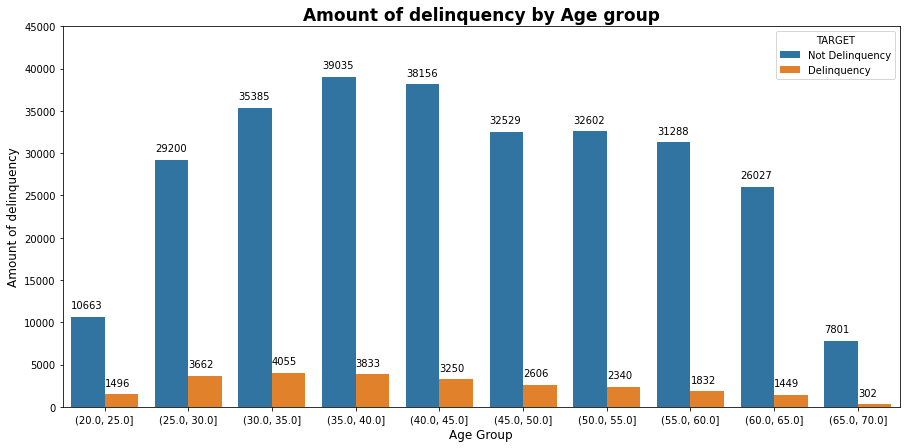

In [4]:
fig,ax = plt.subplots(figsize = (15, 7))
sns.countplot(data=age_bin,x='DAYS_BIN',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x, height + 1000))
ax.set_yticks([each for each in range(0, 50000, 5000)])
ax.set_xlabel('Age Group', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'])
ax.set_title('Amount of delinquency by Age group', size=17, weight='bold')

- DAYS_BIRTH is a continuous variable with a range of 20 - 70. 
- After plotting paid/not paid analysis by age group, we found that people aged 30-35 have the highest tendency to default on debt.
- People aged 35-40 have the highest repayment rate, so people in this group are reliable customers for loans

### NAME_CONTRACT_TYPE

T vẽ 2 kiểu m xem kiểu nào okk thì lấy nhá

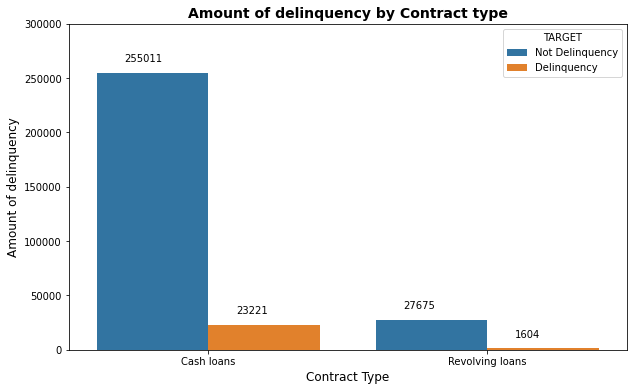

In [5]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(data=final_table,x='NAME_CONTRACT_TYPE',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x+0.1, height + 10000))
ax.set_yticks([each for each in range(0, 350000, 50000)])
ax.set_xlabel('Contract Type', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'])
ax.set_title("Amount of delinquency by Contract type", size = 14, weight = "bold")
plt.show()

In [6]:
group_by_target = final_table[['TARGET', 'NAME_CONTRACT_TYPE']].groupby('TARGET')
group_default_by_contract = group_by_target['NAME_CONTRACT_TYPE'].value_counts(normalize=True)
#group_default_by_contract

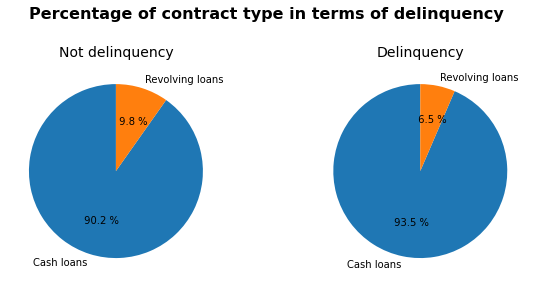

In [7]:
fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(10,4))
ax.pie(group_default_by_contract[0], labels = ['Cash loans', 'Revolving loans'], autopct ='% 1.1f %%', startangle = 90)
ax.set_title('Not delinquency', size=14)
ax1.pie(group_default_by_contract[1], labels = ['Cash loans', 'Revolving loans'], autopct ='% 1.1f %%', startangle = 90)
ax1.set_title('Delinquency', size=14)
ax.text(x = -1, y=1.75, s="Percentage of contract type in terms of delinquency", size = 16, weight = "bold")
plt.show()

- There is a clear difference between cash loans and revolving loans. The majority of deliquency is cash loans (93,5%).
- Cash loans are more risky.

### FLAG_OWN_CAR

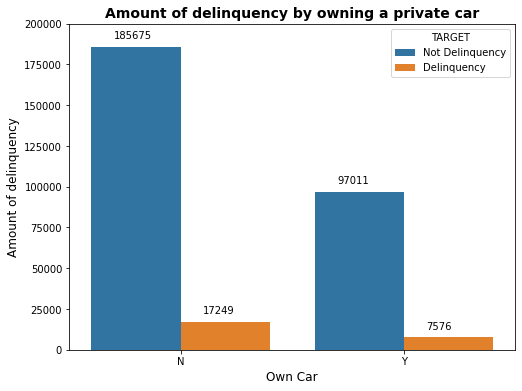

In [8]:
fig,ax = plt.subplots(figsize = (8, 6))
sns.countplot(data=final_table,x='FLAG_OWN_CAR',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x+0.1, height + 5000))
ax.set_yticks([each for each in range(0, 225000, 25000)])
ax.set_xlabel('Own Car', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'])
ax.set_title("Amount of delinquency by owning a private car", size = 14, weight = "bold")
plt.show()

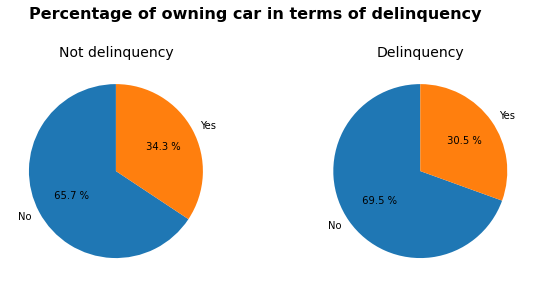

In [9]:
group_by_target = final_table[['TARGET', 'FLAG_OWN_CAR']].groupby('TARGET')
group_default_by_car = group_by_target['FLAG_OWN_CAR'].value_counts(normalize=True)
fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(10,4))
ax.pie(group_default_by_car[0], labels = ['No', 'Yes'], autopct ='% 1.1f %%', startangle = 90)
ax.set_title('Not delinquency', size=14)
ax1.pie(group_default_by_car[1], labels = ['No', 'Yes'], autopct ='% 1.1f %%', startangle = 90)
ax1.set_title('Delinquency', size=14)
ax.text(x = -1, y=1.75, s="Percentage of owning car in terms of delinquency", size = 16, weight = "bold")
plt.show()

People with no cars have more repayment difficulties.

Text(0.5, 1.0, 'Amount of delinquency by the type of house')

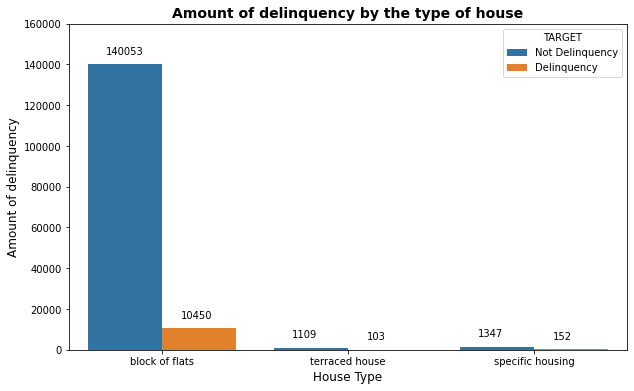

In [10]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(data=final_table,x='HOUSETYPE_MODE',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x+0.1, height + 5000))
ax.set_yticks([each for each in range(0, 180000, 20000)])
ax.set_xlabel('House Type', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'])
ax.set_title("Amount of delinquency by the type of house", size = 14, weight = "bold")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Amount of delinquency by days credit update')

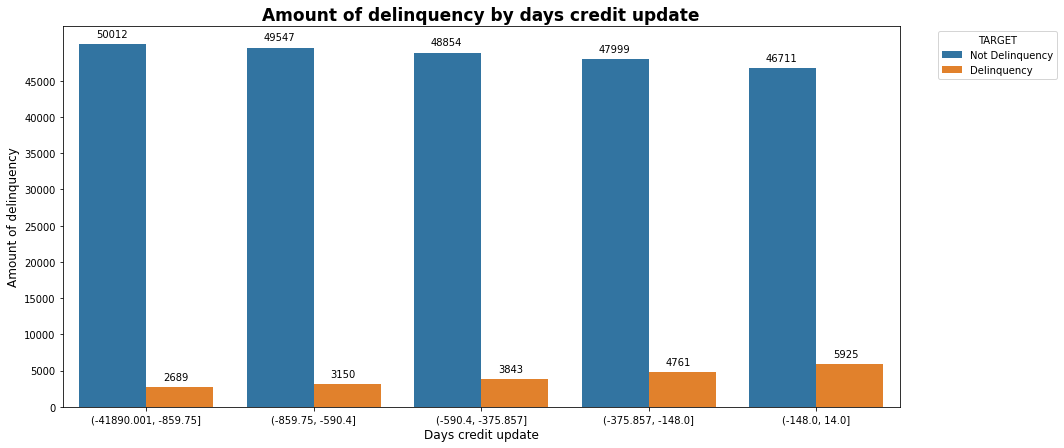

In [11]:
credit_bin = final_table[['TARGET', 'DAYS_CREDIT_UPDATE']]
credit_bin['DAYS_BIN'] = pd.qcut(credit_bin['DAYS_CREDIT_UPDATE'], q = 5)

fig,ax = plt.subplots(figsize = (15, 7))
sns.countplot(data=credit_bin,x='DAYS_BIN',hue='TARGET')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(int(height)), (x+0.1, height + 1000))
ax.set_yticks([each for each in range(0, 50000, 5000)])
ax.set_xlabel('Days credit update', size=12)
ax.set_ylabel('Amount of delinquency', size=12)
ax.legend(title='TARGET',labels=['Not Delinquency', 'Delinquency'], bbox_to_anchor=(1.04, 1))
ax.set_title('Amount of delinquency by days credit update', size=17, weight='bold')